In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2
import os, os.path

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output

In [2]:
%pwd

'D:\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data'

In [13]:
##############   START DESKTOP directory   ################

In [2]:
#change directory for desktop version

%cd C:\\Users\\Jason\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data
    
#check for correct directory path
%pwd

C:\Users\Jason\OneDrive - QJA\My Files\NW Coursework\Predict 454 Advanced Modelling\Final Data


'C:\\Users\\Jason\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data'

In [3]:
#set train and test directories for desktop (onedrive on c)---------------------

#parent folder, working drive, and location of jupyter script
im_dir = 'C:\\Users\\Jason\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data'

#child director containing the training folders: type_1, type_2, type_3
tr_dir = 'C:\\Users\\Jason\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data\\train'

#child directory containing the test files
tst_dir = 'C:\\Users\\Jason\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data\\test'


In [7]:
##############   END DESKTOP directory   ################

In [8]:
##############   START LAPTOP directory   ################

In [2]:
#change directory for laptop version
%cd D:\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data

#check for correct directory path
%pwd

D:\OneDrive - QJA\My Files\NW Coursework\Predict 454 Advanced Modelling\Final Data


'D:\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data'

In [3]:
#set train and test directories for laptop (onedrive on D)

im_dir = 'D:\\OneDrive - QJA\\My Files\\NW Coursework\\Predict 454 Advanced Modelling\\Final Data'

tr_dir ='..\\Final Data\\train'
tst_dir = '..\\Final Data\\test'

In [11]:
##############   END LAPTOP directory   ################

In [119]:
############## BEGIN WORKING WITH CORRECT DIRECTORY   #################

In [4]:
#create objects to represent directory paths
#train image directory
tr_t1 = im_dir + "\\train\\Type_1"
tr_t2 = im_dir + "\\train\\Type_2"
tr_t3 = im_dir + "\\train\\Type_3"

#ex indicates the additional images that were provided for stage2
# tr_t1_ex = im_dir + "\\Type_1"
# tr_t2_ex = im_dir + "\\Type_2"
# tr_t3_ex = im_dir + "\\Type_3"

#test image directory
tst_1 = im_dir + "\\test"
tst_2 = im_dir + "\\test_stg2"

In [5]:
#create objects for files in each directory
#train image directory
tr_t1_f = os.listdir(im_dir + "\\train\\Type_1")
tr_t2_f = os.listdir(im_dir + "\\train\\Type_2")
tr_t3_f = os.listdir(im_dir + "\\train\\Type_3")

#ex indicates the additional images that were provided for stage2
#tr_t1_ex_f = os.listdir(im_dir + "\\Type_1")
#tr_t2_ex_f = os.listdir(im_dir + "\\Type_2")
#tr_t3_ex_f = os.listdir(im_dir + "\\Type_3")

#test image directory
tst_1_f = os.listdir(im_dir + "\\test")
tst_2_f = os.listdir(im_dir + "\\test_stg2")

#tst_9_f = os.listdir(tr_dir)

In [6]:
len(tr_t1_f), len(tr_t2_f), len(tr_t3_f), len(tst_1_f), len(tst_2_f) 
# len(tr_t1_ex_f), len(tr_t2_ex_f), len(tr_t3_ex_f),  len(tst_9_f)

(751, 761, 776, 512, 3506)

In [9]:
#Type1 Review-create lists of questionable images based on:
#objects present in field, quality(blurry), color, and needing cropped or off-center)

# T1_all = (47, 96, 171, 218, 265, 434, 641, 660, 751, 805, 965, 1070, 1194, 1339)

In [88]:
#Type2 Review-create lists of questionable images based on:
#objects present in field, quality(blurry), color, and needing cropped or off-center)

# T2_all = (32, 76, 88, 136, 182, 246, 276, 288, 329, 386, 442, 493, 595, 648, 655, 
#          807, 929, 1068, 1096, 1098, 1151, 1187, 1209, 1217, 1231, 1246, 1249, 1368, 
#           1415, 1421, 1444)


In [89]:
#Type3 Review-create lists of questionable images based on:
#objects present in field, quality(blurry), color, and needing cropped or off-center)

#T3_all = (124, 146, 187, 273, 292, 430, 459, 694, 1031, 1034, 1064, 1248)


In [90]:
#Type1 additional images Review-create lists of questionable images based on:
#objects present in field, quality(blurry), color, and needing cropped or off-center)

#ctl + / to unblock all

#  T1_ex_all = (5, 571, 746, 787, 1081, 1243, 1263, 1452, 1566, 1661, 1785,
#               1790, 1987, 2030, 2032, 2085, 2150, 2175, 2259, 2275, 2344,
#               2402, 2515, 2597, 2630, 2835, 2842, 2877, 2973, 3008, 3048,
#               3090, 3349, 3414, 3415, 3472, 3504, 3634, 3659, 3687, 3751, 
#               3839, 3848, 3974, 3975, 3977, 3980, 3985, 3995, 3996, 4003,
#               4004, 4011, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4021,
#               4022, 4028, 4029, 4031, 4033, 4041, 4042, 4044, 4045, 4047,
#               4048, 4050, 4065, 4193, 4195, 4319, 4320, 4321, 4323, 4338,
#               4371, 4377, 4474, 4510, 4511, 4513, 4514, 4516, 4538, 4541,
#               4556, 4557, 4605, 4666, 4679, 4683, 4685, 4687, 4689, 4691,
#               4693, 4701, 4702, 4703, 4706, 4722, 4874, 4884, 4903, 4928,
#               4944, 5097, 5118, 5120, 5187, 5188, 5189, 5191, 5192, 5355,
#               5356, 5358, 5359, 5360, 5406, 5407, 5408, 5409, 5411, 5769, 
#               5770, 5772, 5774, 5776, 5785, 5786, 5788, 5789, 5810, 5811,
#               5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5883, 5884, 
#               5893, 5911, 5912, 5945, 5947, 5948, 5975, 5976, 5979, 5980, 
#               5981, 5983, 5985, 5986, 5988, 5990, 5992, 5993, 5994, 6004, 
#               6005, 6024, 6026, 6027, 6030, 6050, 6051, 6052, 6063, 6098, 
#               6100, 6101, 6105, 6107, 6108, 6130, 6131, 6140, 6141, 6156, 
#               6157, 6180, 6181, 6187, 6189, 6213, 6214, 6242, 6254, 6255, 
#               6256, 6318, 6320, 6332, 6360, 6361, 6366, 6367, 6368, 6369, 
#               6370, 6372, 6374, 6387, 6389, 6390, 6411, 6412, 6413, 6414, 
#               6416, 6418, 6420, 6421, 6431, 6433, 6434, 6435, 6436, 6445, 
#               6447, 6448, 6461, 6462, 6499, 6500, 6501, 6502, 6503, 6506, 
#               6507, 6527, 6529, 6530, 6454, 6546, 6589, 6590, 6591, 6592, 
#               6624, 6625, 6630, 6651, 6652, 6654, 6685, 6686, 6687, 6688, 
#               6748, 6750, 6783, 6784, 6876, 6787, 6858, 6859, 6860, 6864, 
#               6865, 6866, 6915, 6916, 6917, 6918)


In [7]:
from os import listdir
from os.path import isfile, join
import glob

In [8]:
#get path for all files in the Type1 folder, then split to see file type and cervix type

tr1_files = [os.path.join(tr_t1, f) for f in os.listdir(tr_t1)]
tr1_images = pd.DataFrame({"imagepath": tr1_files})
tr1_images["filetype"] = tr1_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr1_images["type"] = tr1_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr1_images.head()

,imagepath,filetype,type
0,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_1
1,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_1
2,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_1
3,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_1
4,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_1


In [9]:
#get path for all files in the Type2 folder, then split to see file type and cervix type

tr2_files = [os.path.join(tr_t2, f) for f in os.listdir(tr_t2)]
tr2_images = pd.DataFrame({"imagepath": tr2_files})
tr2_images["filetype"] = tr2_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr2_images["type"] = tr2_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr2_images.head()

,imagepath,filetype,type
0,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_2
1,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_2
2,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_2
3,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_2
4,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_2


In [10]:
#get path for all files in the Type3 folder, then split to see file type and cervix type

tr3_files = [os.path.join(tr_t3, f) for f in os.listdir(tr_t3)]
tr3_images = pd.DataFrame({"imagepath": tr3_files})
tr3_images["filetype"] = tr3_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr3_images["type"] = tr3_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr3_images.head()

,imagepath,filetype,type
0,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_3
1,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_3
2,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_3
3,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_3
4,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,Type_3


In [11]:
#get path for all files in the Type1 extra files folder, then split to see file type and cervix type

# tr1_ex_files = [os.path.join(tr_t1_ex, f) for f in os.listdir(tr_t1_ex)]
# tr1_ex_images = pd.DataFrame({"imagepath": tr1_ex_files})
# tr1_ex_images["filetype"] = tr1_ex_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
# tr1_ex_images["type"] = tr1_ex_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
# tr1_ex_images.head()

#get path for all files in the Type2 extra files folder, then split to see file type and cervix type

# tr2_ex_files = [os.path.join(tr_t2_ex, f) for f in os.listdir(tr_t2_ex)]
# tr2_ex_images = pd.DataFrame({"imagepath": tr2_ex_files})
# tr2_ex_images["filetype"] = tr2_ex_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
# tr2_ex_images["type"] = tr2_ex_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
# tr2_ex_images.head()

#get path for all files in the Type3 extra files folder, then split to see file type and cervix type

# tr3_ex_files = [os.path.join(tr_t3_ex, f) for f in os.listdir(tr_t3_ex)]
# tr3_ex_images = pd.DataFrame({"imagepath": tr3_ex_files})
# tr3_ex_images["filetype"] = tr3_ex_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
# tr3_ex_images["type"] = tr3_ex_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
# tr3_ex_images.head()

In [12]:
#get path for all files in the test folder, then split to see file type and cervix type

tst_1_files = [os.path.join(tst_1, f) for f in os.listdir(tst_1)]
tst_1_images = pd.DataFrame({"imagepath": tst_1_files})
tst_1_images["filetype"] = tst_1_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tst_1_images["type"] = tst_1_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tst_1_images.head()

,imagepath,filetype,type
0,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,test
1,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,test
2,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,test
3,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,test
4,C:\Users\Jason\OneDrive - QJA\My Files\NW Cour...,jpg,test


In [13]:
#get path for all files in the test stage 2 folder, then split to see file type and cervix type

# tst_2_files = [os.path.join(tst_2, f) for f in os.listdir(tst_2)]
# tst_2_images = pd.DataFrame({"imagepath": tst_2_files})
# tst_2_images["filetype"] = tst_2_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
# tst_2_images["type"] = tst_2_images.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
# tst_2_images.head()

In [14]:
#make sure correct number of rows is pulled into the data frame for each folder

len(tr1_images), len(tr2_images), len(tr3_images), len(tst_1_images), #len(tst_2_images)
# len(tr1_ex_images), len(tr2_ex_images), len(tr3_ex_images)

(751, 761, 776, 512)

In [15]:
#combine 
tr_all_1 = tr1_images.append(tr2_images)
tr_all_1 = tr_all_1.append(tr3_images)

In [16]:
#confirm all rows were appended
len(tr_all_1), len(tr1_images) + len(tr2_images) + len(tr3_images)

(2288, 2288)

There are 2288 images in the combined data set


Text(0.5,0,'training size fraction')

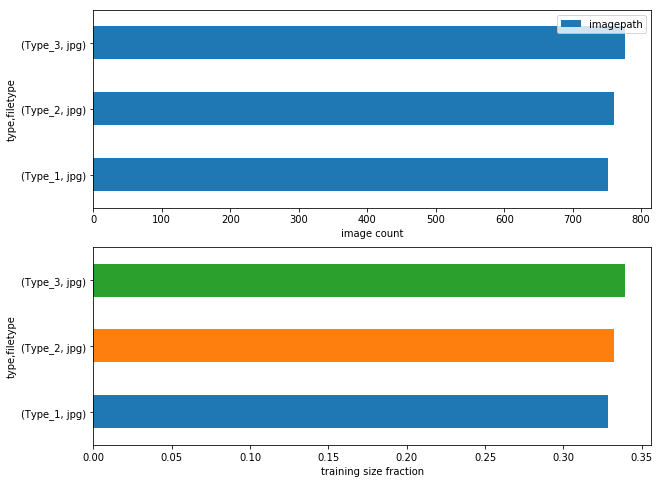

In [17]:
#from Kernel "Cervix EDA by Phillip Schmidt"
print ("There are {} images in the combined data set".format(tr_all_1.shape[0]))

type_aggregation = tr_all_1.groupby(["type", "filetype"]).agg("count")
type_aggregation_perc = type_aggregation.apply(lambda row: 1.0*row["imagepath"]/tr_all_1.shape[0], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))

type_aggregation.plot.barh(ax=axes[0])
axes[0].set_xlabel("image count")
type_aggregation_perc.plot.barh(ax=axes[1])
axes[1].set_xlabel("training size fraction")

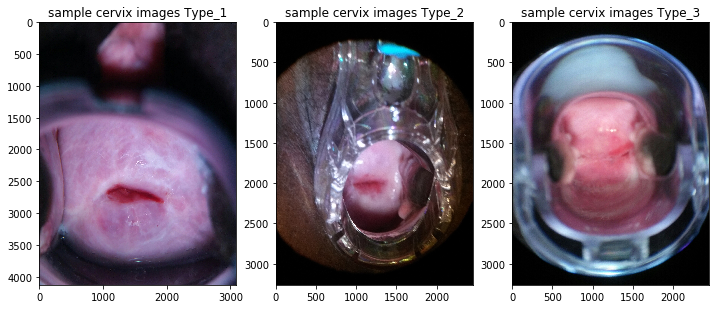

In [18]:
#print an image for each cervix type

fig = plt.figure(figsize=(12,12))

i = 1
for t in tr_all_1["type"].unique():
    ax = fig.add_subplot(1,3,i)
    i+=1
    f = tr_all_1[tr_all_1["type"]==t]["imagepath"].values[0]
    plt.imshow(plt.imread(f))
    plt.title("sample cervix images {}".format(t))

In [19]:
#exif data is corrupt.  This removes it
#blocked off because already run once--------------

# import piexif

# for f in tr1_files:
#     piexif.remove(f)

# for f in tr2_files:
#     piexif.remove(f)
    
# for f in tr3_files:
#     piexif.remove(f)

# #remove exif data for test files
# for f in tst_1_files:
#     piexif.remove(f)

In [19]:
#look at different image shapes

from collections import defaultdict

images = defaultdict(list)

for t in tr_all_1["type"].unique():
    sample_counter = 0
    for _, row in tr_all_1[tr_all_1["type"]==t].iterrows():
        
        try:
            img = imread(row.imagepath)
            sample_counter +=1
            images[t].append(img)
        except:
            print("image read failed for {}".format(row.imagepath))
        if sample_counter > 35:
            break

In [20]:
dfs = []
for t in tr_all_1['type'].unique():
    t_ = pd.DataFrame(
        {
            'nrows': list(map(lambda i: i.shape[0], images[t])),
            'ncols': list(map(lambda i: i.shape[1], images[t])),
            'nchans': list(map(lambda i: i.shape[2], images[t])),
            'type': t
        }
    )
    dfs.append(t_)

shapes_df = pd.concat(dfs, axis=0)
shapes_df_grouped = shapes_df.groupby(by=['nchans', 'ncols', 'nrows', 'type']).size().reset_index().sort_values(['type', 0], ascending=False)
shapes_df_grouped



,nchans,ncols,nrows,type,0
3,3,2448,3264,Type_3,27
6,3,3096,4128,Type_3,7
8,3,3120,4160,Type_3,1
9,3,3264,2448,Type_3,1
5,3,3096,4128,Type_2,18
2,3,2448,3264,Type_2,17
10,3,4128,3096,Type_2,1
4,3,3096,4128,Type_1,19
1,3,2448,3264,Type_1,12
7,3,3120,4160,Type_1,4


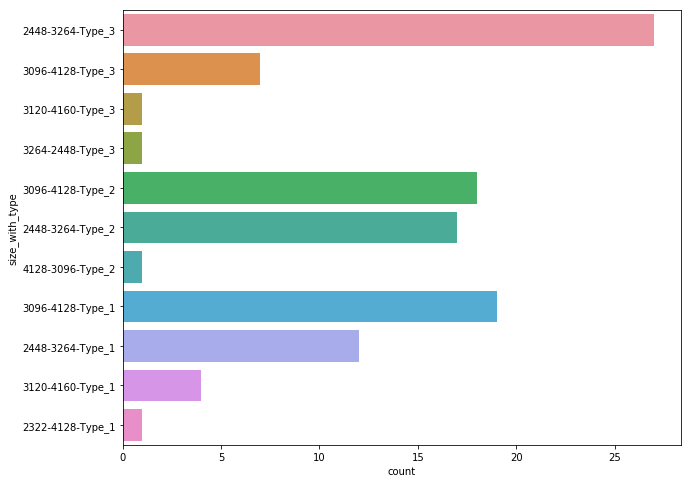

In [21]:
shapes_df_grouped['size_with_type'] = shapes_df_grouped.apply(lambda row: '{}-{}-{}'.format(row.ncols, row.nrows, row.type), axis=1)
shapes_df_grouped = shapes_df_grouped.set_index(shapes_df_grouped['size_with_type'].values)
shapes_df_grouped['count'] = shapes_df_grouped[[0]]

plt.figure(figsize=(10,8))
#shapes_df_grouped['count'].plot.barh(figsize=(10,8))
sns.barplot(x="count", y="size_with_type", data=shapes_df_grouped)

In [ ]:
#kernel from Phillip Schmidt: Cervix EDA and Model Selection
#TSNE Embedding

In [22]:
def transform_image(img, rescaled_dim, to_gray=False):
    resized = cv2.resize(img, (rescaled_dim, rescaled_dim), cv2.INTER_LINEAR)

    if to_gray:
        resized = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY).astype('float')
    else:
        resized = resized.astype('float')

    normalized = cv2.normalize(resized, None, 0.0, 1.0, cv2.NORM_MINMAX)
    timg = normalized.reshape(1, np.prod(normalized.shape))

    return timg/np.linalg.norm(timg)

rescaled_dim = 100

In [23]:
all_images = []
all_images_types = []

for t in tr_all_1['type'].unique():
    all_images = all_images + images[t]
    all_images_types = all_images_types + len(images[t])*[t]

In [24]:
# - normalize each uint8 image to the value interval [0, 1] as float image
# - rgb to gray
# - downsample image to rescaled_dim X rescaled_dim
# - L2 norm of each sample = 1

gray_all_images_as_vecs = [transform_image(img, rescaled_dim) for img in all_images]

gray_imgs_mat = np.array(gray_all_images_as_vecs).squeeze()
all_images_types = np.array(all_images_types)
gray_imgs_mat.shape, all_images_types.shape

((108, 30000), (108,))

In [25]:
len(tr_all_1['type'])

2288

In [26]:
from sklearn.manifold import TSNE

In [27]:
#Project the images to 3D to look at dimesion patterns


tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2
).fit_transform(gray_imgs_mat)


#Create 3D plot of image type cluster

from sklearn import preprocessing

trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = preprocessing.LabelEncoder().fit_transform(all_images_types),
        colorscale = 'Portland',
        colorbar = dict(title = 'cervix types'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.9
    )
)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 108 samples in 0.004s...
[t-SNE] Computed neighbors for 108 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 108 / 108
[t-SNE] Mean sigma: 0.221387
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 104.4344482, gradient norm = 0.1906525 (50 iterations in 0.108s)
[t-SNE] Iteration 100: error = 119.8619766, gradient norm = 0.1614356 (50 iterations in 0.088s)
[t-SNE] Iteration 150: error = 127.6287689, gradient norm = 0.1494994 (50 iterations in 0.077s)
[t-SNE] Iteration 200: error = 139.8844910, gradient norm = 0.1225944 (50 iterations in 0.078s)
[t-SNE] Iteration 250: error = 143.4084778, gradient norm = 0.1205968 (50 iterations in 0.094s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 143.408478
[t-SNE] Iteration 300: error = 3.1884787, gradient norm = 0.0003424 (50 iterations in 0.077s)
[t-SNE] Iteration 350: error = 2.6752896, gradient norm = 0.000

In [28]:
#Create 3D plot of clusters: random sample (108) from each type (1,2,3)
#requires:
# %matplotlib inline
# import plotly.offline as py
py.init_notebook_mode(connected=True)

data=[trace1]
layout=dict(height=800, width=800, title='3D embedding of images')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

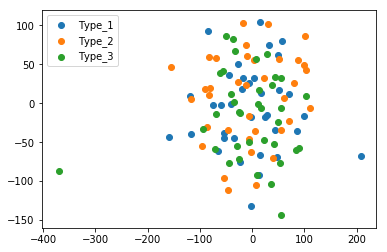

In [26]:
#2D plot of clusters: random sample (108) from each type (1,2,3)
for t in tr_all_1['type'].unique():
    tsne_t = tsne[np.where(all_images_types == t), :][0]
    plt.scatter(tsne_t[:, 0], tsne_t[:, 1])
plt.legend(tr_all_1['type'].unique())

In [27]:
#Identify cervix region of interest
#Kernel from Guy Zahavi: "Identifying the cervix region of interest"

import math
from sklearn import mixture
from sklearn.utils import shuffle

In [35]:
## See Kernel from Ankit Gupta for basic load and run: "Basic"
## See Kernel from ZFTurbo for cervix rectangle generator: "Cervix Rectangles Generator"
## See Kernel from Baleal for Neural Network: "Cervicses"

In [39]:
#######################################################
#
#
#      Files on local drive 
#
#
#######################################################

In [ ]:
############Resize Images##################

In [3]:
import os, os.path

#set train and test directories for desktop local C drive------------------------

#local directory parent folder containing the training folders: type_1, type_2, type_3 and test files
dir_loc = 'C:\\Users\\Jason\\Desktop\\Cervix'
dir_loc_sub = '\\NN128x128'

#local directory parent folder containing the training folders: type_1, type_2, type_3
tr1_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_1'
tr2_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_2'
tr3_dir_loc = dir_loc + dir_loc_sub + '\\train\\Type_3'

#local directory parent folder containing the test files
tst1_dir_loc = dir_loc + dir_loc_sub + '\\test'


#files for each training type (1,2,3)
tr1_f_loc = [os.path.join(tr1_dir_loc, f) for f in os.listdir(tr1_dir_loc)]
tr2_f_loc = [os.path.join(tr2_dir_loc, f) for f in os.listdir(tr2_dir_loc)]
tr3_f_loc = [os.path.join(tr3_dir_loc, f) for f in os.listdir(tr3_dir_loc)]

#test image directory
tst1_f_loc = [os.path.join(tst1_dir_loc, f) for f in os.listdir(tst1_dir_loc)]

In [4]:
#remove corrupt exif data for local files

import piexif  

for f in tr1_f_loc:
    piexif.remove(f)

for f in tr2_f_loc:
    piexif.remove(f)
    
for f in tr3_f_loc:
    piexif.remove(f)
    
for f in tst1_f_loc:
    piexif.remove(f)
    
##this operations was already performed on files saved locally so 
##it is blocked off here 

In [5]:
#resize type1 files

from PIL import Image, ImageFile
import os, sys

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

ImageFile.LOAD_TRUNCATED_IMAGES = True

path1 = tr1_dir_loc + "\\"
dirs = os.listdir( path1 )
final_size = 600;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path1+item):
            im = Image.open(path1+item)
            f, e = os.path.splitext(path1+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()


In [6]:
#resize type2 files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path2 = tr2_dir_loc + "\\"
dirs = os.listdir( path2 )
final_size = 600;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path2+item):
            im = Image.open(path2+item)
            f, e = os.path.splitext(path2+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()


In [7]:
#resize type3 files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path3 = tr3_dir_loc + "\\"
dirs = os.listdir( path3 )
final_size = 600;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path3+item):
            im = Image.open(path3+item)
            f, e = os.path.splitext(path3+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

In [8]:
#resize test files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

path4 = tst1_dir_loc + "\\"
dirs = os.listdir( path4 )
final_size = 600;

def resize_aspect_fit():
    for item in dirs:
        if item == '.DS_Store':
            continue
        if os.path.isfile(path4+item):
            im = Image.open(path4+item)
            f, e = os.path.splitext(path4+item)
            size = im.size
            ratio = float(final_size) / max(size)
            new_image_size = tuple([int(x*ratio) for x in size])
            im = im.resize(new_image_size, Image.ANTIALIAS)
            new_im = Image.new("RGB", (final_size, final_size))
            new_im.paste(im, ((final_size-new_image_size[0])//2, (final_size-new_image_size[1])//2))
            new_im.save(f + '.jpg', 'JPEG', quality=95)
resize_aspect_fit()

In [9]:
#CROP FILES USING DIMENSIONS (75, 80, 525, 530): these produce square image
#and are based on visual review of images with cervix located in most extreme
#area of the field

#use the below to test 1 image
# img = Image.open("C:\\Users\\Jason\\Desktop\\Cervix\\632res.jpg")
# #crop(left: x, y, right:x, y)
# img2 = img.crop((75, 80, 525, 530))
# img2.save("C:\\Users\\Jason\\Desktop\\Cervix\\img2.jpg")

#crop type1 files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

from PIL import Image, ImageFile
# import os, sys -already loaded above
ImageFile.LOAD_TRUNCATED_IMAGES = True

path1 = tr1_dir_loc + "\\"
dirs = os.listdir( path1 )

def crop():
    for item in dirs:
        fullpath = os.path.join(path1,item)         #corrected
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((75, 90, 525, 510)) #corrected
            imCrop.save(f + '.jpg', "JPEG", quality=100)

crop()

In [10]:
#crop type2 files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

# ImageFile.LOAD_TRUNCATED_IMAGES = True

path2 = tr2_dir_loc + "\\"
dirs = os.listdir( path2 )

def crop():
    for item in dirs:
        fullpath = os.path.join(path2,item)         #corrected
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((75, 90, 525, 510)) #corrected
            imCrop.save(f + '.jpg', "JPEG", quality=100)

crop()

In [11]:
#crop type3 files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

# ImageFile.LOAD_TRUNCATED_IMAGES = True

path3 = tr3_dir_loc + "\\"
dirs = os.listdir( path3 )

def crop():
    for item in dirs:
        fullpath = os.path.join(path3,item)         #corrected
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((75, 90, 525, 510)) #corrected
            imCrop.save(f + '.jpg', "JPEG", quality=100)

crop()

In [12]:
#crop test files

#this operations to resize files was alreay performed and saved locally
#so doesn't need to be run again

# ImageFile.LOAD_TRUNCATED_IMAGES = True

path4 = tst1_dir_loc + "\\"
dirs = os.listdir( path4 )

def crop():
    for item in dirs:
        fullpath = os.path.join(path4,item)         #corrected
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((75, 90, 525, 510)) #corrected
            imCrop.save(f + '.jpg', "JPEG", quality=100)

crop()

(600, 600, 3)


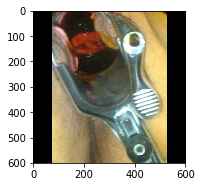

In [47]:
#compare original image with scaled and cropped image

import imageio

testImage = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix\\632res.jpg")

testImageGray = testImage[:,:,0]

plt.figure()
plt.gray()

plt.subplot(121)
plt.imshow(testImage)

print(testImage.shape)

(420, 450, 3)


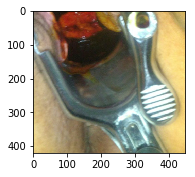

In [48]:
#cropped and re-sized image
testImage1 = imageio.imread("C:\\Users\\Jason\\Desktop\\Cervix\\train\\Type_1\\632resCropped.jpg")

plt.figure()

plt.subplot(121)
plt.imshow(testImage1)

print(testImage1.shape)

(420, 450)


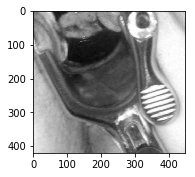

In [49]:
#cropped and resized grey image
testImageGray1 = testImage1[:,:,0]

plt.subplot(121)
plt.imshow(testImageGray1)

print (testImageGray1.shape)

In [ ]:
#######################################################
#
#
#      Read Images into Python 
#
#
#######################################################

In [3]:
from subprocess import check_output

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from time import time
from time import sleep

import pandas as pd
import scipy.misc

import matplotlib.pyplot as plt 

In [10]:
import imageio

In [7]:
#get path for all files in the local C: Type1 folder, then split to see file type and cervix type

#tr1_f_loc = [os.path.join(tr_t1, f) for f in os.listdir(tr_t1)]
tr1_im_loc = pd.DataFrame({"imagepath": tr1_f_loc})
tr1_im_loc["filetype"] = tr1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr1_im_loc["type"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr1_im_loc["name"] = tr1_im_loc.apply(lambda row: row.imagepath.split("\\")[7], axis=1)
tr1_im_loc.head()

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\train\Type_1\101...,jpg,Type_1,1013resCropped.jpg
1,C:\Users\Jason\Desktop\Cervix\train\Type_1\101...,jpg,Type_1,1014resCropped.jpg
2,C:\Users\Jason\Desktop\Cervix\train\Type_1\101...,jpg,Type_1,1019resCropped.jpg
3,C:\Users\Jason\Desktop\Cervix\train\Type_1\102...,jpg,Type_1,1023resCropped.jpg
4,C:\Users\Jason\Desktop\Cervix\train\Type_1\102...,jpg,Type_1,1024resCropped.jpg


In [13]:
# a=imageio.imread('C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_1\\1013resCropped.jpg')

# plt.imshow(a)

In [14]:
#create ylab1

y1 = tr1_im_loc['type']
len(y1)

751

In [15]:
tr2_im_loc = pd.DataFrame({"imagepath": tr2_f_loc})
tr2_im_loc["filetype"] = tr2_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr2_im_loc["type"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr2_im_loc["name"] = tr2_im_loc.apply(lambda row: row.imagepath.split("\\")[7], axis=1)
tr2_im_loc.head()

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\train\Type_2\100...,jpg,Type_2,1001resCropped.jpg
1,C:\Users\Jason\Desktop\Cervix\train\Type_2\100...,jpg,Type_2,1002resCropped.jpg
2,C:\Users\Jason\Desktop\Cervix\train\Type_2\100...,jpg,Type_2,1005resCropped.jpg
3,C:\Users\Jason\Desktop\Cervix\train\Type_2\100...,jpg,Type_2,1006resCropped.jpg
4,C:\Users\Jason\Desktop\Cervix\train\Type_2\100...,jpg,Type_2,100resCropped.jpg


In [16]:
#create ylab2

y2 = tr2_im_loc['type']
len(y2)

761

In [17]:
tr3_im_loc = pd.DataFrame({"imagepath": tr3_f_loc})
tr3_im_loc["filetype"] = tr3_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tr3_im_loc["type"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tr3_im_loc["name"] = tr3_im_loc.apply(lambda row: row.imagepath.split("\\")[7], axis=1)
tr3_im_loc.head()

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\train\Type_3\100...,jpg,Type_3,1000resCropped.jpg
1,C:\Users\Jason\Desktop\Cervix\train\Type_3\100...,jpg,Type_3,1003resCropped.jpg
2,C:\Users\Jason\Desktop\Cervix\train\Type_3\100...,jpg,Type_3,1004resCropped.jpg
3,C:\Users\Jason\Desktop\Cervix\train\Type_3\100...,jpg,Type_3,1007resCropped.jpg
4,C:\Users\Jason\Desktop\Cervix\train\Type_3\100...,jpg,Type_3,1008resCropped.jpg


In [18]:
#create ylab3

y3 = tr3_im_loc['type']
len(y3)

776

In [19]:
tst1_im_loc = pd.DataFrame({"imagepath": tst1_f_loc})
tst1_im_loc["filetype"] = tst1_im_loc.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
tst1_im_loc["type"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[-2], axis=1)
tst1_im_loc["name"] = tst1_im_loc.apply(lambda row: row.imagepath.split("\\")[6], axis=1)
tst1_im_loc.head()

,imagepath,filetype,type,name
0,C:\Users\Jason\Desktop\Cervix\test\0resCropped...,jpg,test,0resCropped.jpg
1,C:\Users\Jason\Desktop\Cervix\test\100resCropp...,jpg,test,100resCropped.jpg
2,C:\Users\Jason\Desktop\Cervix\test\101resCropp...,jpg,test,101resCropped.jpg
3,C:\Users\Jason\Desktop\Cervix\test\102resCropp...,jpg,test,102resCropped.jpg
4,C:\Users\Jason\Desktop\Cervix\test\103resCropp...,jpg,test,103resCropped.jpg


In [42]:
#get the name of the images for testing
tst_name = tst1_im_loc['name']
len(tst_name), len(tst1_im_loc)

(512, 512)

In [23]:
#combine all data frames together

tr_all_loc = tr1_im_loc.append(tr2_im_loc)
tr_all_loc = tr_all_loc.append(tr3_im_loc)

In [24]:
#check to make sure all files appended from each folder
len(tr_all_loc), len(tr1_im_loc) + len(tr2_im_loc) + len(tr3_im_loc)

(2288, 2288)

In [25]:
tr_all_loc.head(), tr_all_loc.tail()

(                                           imagepath filetype    type  \
 0  C:\Users\Jason\Desktop\Cervix\train\Type_1\101...      jpg  Type_1   
 1  C:\Users\Jason\Desktop\Cervix\train\Type_1\101...      jpg  Type_1   
 2  C:\Users\Jason\Desktop\Cervix\train\Type_1\101...      jpg  Type_1   
 3  C:\Users\Jason\Desktop\Cervix\train\Type_1\102...      jpg  Type_1   
 4  C:\Users\Jason\Desktop\Cervix\train\Type_1\102...      jpg  Type_1   
 
                  name  
 0  1013resCropped.jpg  
 1  1014resCropped.jpg  
 2  1019resCropped.jpg  
 3  1023resCropped.jpg  
 4  1024resCropped.jpg  ,
                                              imagepath filetype    type  \
 771  C:\Users\Jason\Desktop\Cervix\train\Type_3\98r...      jpg  Type_3   
 772  C:\Users\Jason\Desktop\Cervix\train\Type_3\992...      jpg  Type_3   
 773  C:\Users\Jason\Desktop\Cervix\train\Type_3\993...      jpg  Type_3   
 774  C:\Users\Jason\Desktop\Cervix\train\Type_3\995...      jpg  Type_3   
 775  C:\Users\Jason\De

In [27]:
#combine all ylabels together
type_all = y1.append(y2)
type_all = type_all.append(y3)
len(type_all), type_all.head(), type_all.tail()

(2288, 0    Type_1
 1    Type_1
 2    Type_1
 3    Type_1
 4    Type_1
 Name: type, dtype: object, 771    Type_3
 772    Type_3
 773    Type_3
 774    Type_3
 775    Type_3
 Name: type, dtype: object)

In [29]:
#convert all train images in the combined data frame to gray scale npy array

import cv2

arr_images_gr = []        

for image in tr_all_loc["imagepath"]:
    arr_images_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

In [31]:
arr_images_gr[0:2]

[array([[222, 223, 222, ...,  33,  35,  35],
        [221, 222, 222, ...,  34,  35,  35],
        [220, 221, 220, ...,  34,  35,  35],
        ...,
        [255, 255, 254, ...,  22,  21,  20],
        [255, 255, 254, ...,  22,  21,  20],
        [255, 255, 254, ...,  22,  21,  20]], dtype=uint8),
 array([[184, 184, 183, ..., 212, 212, 212],
        [183, 183, 182, ..., 213, 210, 213],
        [183, 182, 181, ..., 214, 212, 213],
        ...,
        [164, 163, 161, ...,  88,  88,  87],
        [164, 163, 161, ...,  86,  88,  88],
        [164, 163, 161, ...,  85,  87,  88]], dtype=uint8)]

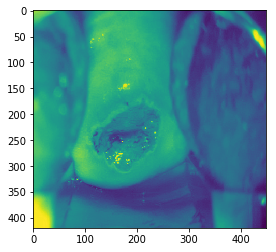

In [32]:
plt.imshow(arr_images_gr[0])

In [35]:
#convert all images in the combined data frame to rbg scale npy array

arr_images = []        

for image in tr_all_loc["imagepath"]:
    arr_images.append(cv2.imread(image, cv2.COLOR_BGR2RGB))


In [37]:
arr_images[0]

array([[[220, 227, 214],
        [221, 228, 213],
        [218, 228, 211],
        ...,
        [  1,  31,  50],
        [  7,  33,  49],
        [  7,  34,  48]],

       [[219, 226, 213],
        [220, 227, 212],
        [220, 228, 211],
        ...,
        [  4,  31,  51],
        [  7,  33,  49],
        [  7,  34,  48]],

       [[220, 224, 212],
        [219, 226, 211],
        [218, 226, 209],
        ...,
        [  4,  31,  51],
        [  7,  33,  49],
        [  7,  34,  48]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  3,  19,  35],
        [  3,  19,  32],
        [  4,  18,  30]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  3,  19,  35],
        [  3,  19,  32],
        [  4,  18,  30]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  3,  19,  35],
        [  3,  19,  32],
        [  4,  18,  30]]

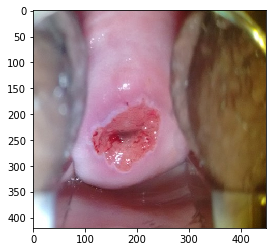

In [38]:
#Below is example to print multiple images and label them
# im_dir2 = 'C:\\Users\\Jason\Desktop\\Cervix\\train\\Type_1'
# onlyfiles = [f for f in os.listdir(im_dir2) if os.path.isfile(os.path.join(im_dir2, f))]

# print("Working with {0} images".format(len(onlyfiles)))
# print("Image examples: ")

# for i in range(0,2):
#     print(onlyfiles[i])
#     display(_Imgdis(filename=im_dir2 + "\\" + onlyfiles[i], width=240, height=320))



#shows image [0] froml the array.  note that cv2 uses blue, greeh, red
#scheme which reverses the colors so it is specified below to convert back

plt.imshow(cv2.cvtColor(arr_images[0], cv2.COLOR_BGR2RGB))

In [39]:
#convert all test images in the combined data frame to gray scale npy array

arr_images_tst_gr = []        

for image in tst1_im_loc["imagepath"]:
    arr_images_tst_gr.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))

In [40]:
#convert all test images in the combined data frame to rbg scale npy array

arr_images_tst_rbg = []        

for image in tst1_im_loc["imagepath"]:
    arr_images_tst_rbg.append(cv2.imread(image, cv2.COLOR_BGR2RGB))

In [41]:
import piexif
from collections import defaultdict

import math

In [159]:

#########Save Gray and Non-Gray Arrays################
######################################################


In [44]:
#save the training files and the y variable to numpy arrays

import numpy as np

np.save("array_file_rbg", arr_images)
np.save("array_file_gray", arr_images_gr)
np.save("y_train_types", type_all)



In [45]:
#save the testfile to numpy arrays

np.save("array_file_tst_gray", arr_images_tst_gr)
np.save("array_file_tst_rbg", arr_images_tst_rbg)
np.save("test_filenames", tst_name)